### 판다스(Pandas)
- 데이터 처리 라이브러리 중 가장 인기있는 라이브러리이다.
- 2차원 데이터(테이블, 엑셀, CSV 등)를 효율적으로 가공 및 처리할 수 있다.  
📌대부분의 Dataset은 인간이 가장 이해하기 쉬운 구조인 2차원(행, 열)이다.

### 판다스 구성 요소
- DataFrame : 행과 열로 구성된 2차원 Dataset을 의미한다.
- Series : 1개의 열로만 구성된 1차원 Dataset을 의미한다.
- Index : DataFrame과 Series에서 중복없는 행 번호를 의미한다.

In [1]:
import pandas as pd

pd.__version__

'2.0.3'

### read_csv()
- .csv 파일을 DataFrame으로 읽어온다.

### display()
- 텍스트 데이터를 더 보기 좋게 표 형태로 출력할 때 사용한다.

In [2]:
happiness_df = pd.read_csv('./datasets/happiness_report_2022.csv')
print(type(happiness_df))
display(happiness_df)

<class 'pandas.core.frame.DataFrame'>


,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income
3,Switzerland,7.512,High income
4,Netherlands,7.415,High income
...,...,...,...
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income


### head()
- 전체 데이터 중 앞부분 일부를 가져온다.

### tail()
- 전체 데이터 중 뒷부분 일부를 가져온다.

In [3]:
display(happiness_df.head(10))
display(happiness_df.tail(10))

,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income
3,Switzerland,7.512,High income
4,Netherlands,7.415,High income
5,Luxembourg,7.404,High income
6,Sweden,7.384,High income
7,Norway,7.365,High income
8,Israel,7.364,High income
9,New Zealand,7.200,High income


,country,score,income
136,Zambia,3.760,Low income
137,Malawi,3.750,Low income
138,Tanzania,3.702,Lower middle income
139,Sierra Leone,3.574,Low income
140,Lesotho,3.512,Lower middle income
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income
145,Afghanistan,2.404,Low income


In [4]:
# 원하는 컬럼만 가져오기

# 1차원으로 접근하면 Series 타입이다.
print(type(happiness_df["country"]))

# 2차원으로 접근해야 DataFrame 타입이다.
print(type(happiness_df[["country"]]))

# 여러 컬럼을 가져올 때
display(happiness_df[["country", "score"]])

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,country,score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
...,...,...
141,Botswana,3.471
142,Rwanda,3.268
143,Zimbabwe,2.995
144,Lebanon,2.955


### shape
- DataFrame의 행(Row)과 열(Column) 크기를 가지고 있는 속성이다.
- index는 열 개수에 포함하지 않는다.

In [5]:
print(happiness_df.shape)

(146, 3)


### DataFrame()
- dict를 DataFrame으로 변환할 때 사용한다.
- 컬럼명을 추가하거나 인덱스명을 변경하는 등 다양하게 설정할 수 있다.

In [6]:
film = {
    'Title': ['명량', '극한 직업', '범죄 도시3', '국제 시장'],
    'Audience': [17_615_919, 16_266_480, 10_682_674, 14_265_222],
    'Country': ['한국', '한국', '한국', '한국']
}

# dict를 DataFrame으로 변환
film_df = pd.DataFrame(film)
display(film_df)

# 새로운 컬럼명 추가
film_df = pd.DataFrame(film, columns=['Title', 'Audience', 'Country', 'Income'])
display(film_df)

# 기존 값 변경
film_df["Income"] = [135_758_658_810, 139_657_105_516, 104_686_489_632, 110_951_970_230]
display(film_df)

# 인덱스명 변경
# film_df = pd.DataFrame(film, index=['one', 'two', 'three', 'four'])
# display(film_df)

,Title,Audience,Country
0,명량,17615919,한국
1,극한 직업,16266480,한국
2,범죄 도시3,10682674,한국
3,국제 시장,14265222,한국


,Title,Audience,Country,Income
0,명량,17615919,한국,NaN
1,극한 직업,16266480,한국,NaN
2,범죄 도시3,10682674,한국,NaN
3,국제 시장,14265222,한국,NaN


,Title,Audience,Country,Income
0,명량,17615919,한국,135758658810
1,극한 직업,16266480,한국,139657105516
2,범죄 도시3,10682674,한국,104686489632
3,국제 시장,14265222,한국,110951970230


### DataFrame의 상세 정보 조회
- columns : 컬럼명 조회
- index : 인덱스 조회(start, stop, step)
- index.values : 인덱스 목록 조회
- info() : 컬럼명, 데이터 타입, Null 건수, 데이터 건수 정보 등 조회

In [7]:
happiness_df = pd.read_csv("./datasets/happiness_report_2022.csv")
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  146 non-null    object 
 1   score    146 non-null    float64
 2   income   140 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


### describe()
- 숫자형 데이터의 개수, 평균, 표준편차, 최소값, 4분위 분포도(중앙값: 50%), 최대값을 제공한다.

#### 📌표준편차란,
실제 데이터 값이 평균을 기준으로 할 때 얼마나 기복이 있는 지를 나타내는 것이다.  
데이터를 분석할 때 해당 데이터가 제대로 된 데이터인지 탐색해야 하며,
아래의 순서로 탐색을 진행한다.

#### 평균 → 중앙값 → 최빈값 → 범위 → 4분위 분포 → 분산 → 표준편차

#### 🏆 데이터 탐색을 하는 이유는, <br><br>결측치가 있을 경우 대체할 값(대표값)을 선정하기 위함이다.<br>결측치란, 없는 값 즉, Null 혹은 NaN를 의미한다.<br><br>데이터 탐색을 통해 대표값을 어떤 것으로 정할 지 판단해야 하며, <br> 평균(mean), 중앙값(median), 최빈값(mode)등을 모두 판단해봐야 한다.

1. 평균에만 의지할 경우
> dataset: [1, 2, 3, 4, 100]
> mean: 55
> - 이상치로 인해 평균을 대표값으로 사용하기 힘들다.

2. 중앙값에만 의지할 경우
> dataset: [1, 1, 1, 1, 100, 200]
> median: 1
> - 최근 값 증가로 인해 중앙값을 대표값으로 사용하기 힘들다.

3. 최빈값에만 의지할 경우
> dataset: ["RED", "BLUE", "BLUE", "RED"]
> mode: 2
> - 최빈값이 중복되어 대표값으로 사용하기 힘들다.

<img src="./images/pandas.png" width="500" style="margin-left: 20px">  

### Left skew
- 큰 데이터가 많이 분포하고 있다.
- 평균(mean) < 중앙값(median) < 최빈값(mode)

### Normal distribution
- 데이터가 골고루 분포하고 있다.
- 평균(mean) = 중앙값(median) = 최빈값(mode)

### Right skew
- 작은 데이터가 많고 큰 데이터는 많지 않다.
- 평균(mean) > 중앙값(median) > 최빈값(mode)

In [8]:
display(happiness_df.describe().T)
happiness_df.mode(axis=0, numeric_only=True, dropna=True)

,count,mean,std,min,25%,50%,75%,max
score,146.0,5.553575,1.086843,2.404,4.88875,5.5685,6.305,7.821


,score
0,4.516
1,5.048
2,5.122
3,5.199
4,5.377


<Axes: xlabel='income'>

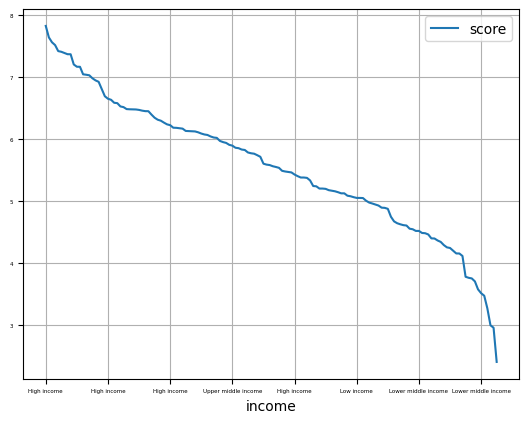

In [9]:
happiness_df.plot(x='income', y='score', fontsize='4', kind='line', grid=True)

### value_counts()
- 동일한 데이터의 개수를 알고 싶을 때 사용한다(데이터 분포), 항목이 여러 개일 경우 개수는 내림차순으로 정렬되어 출력된다.
- dropna에 True를 전달하면 NaN값은 제외하고 카운팅하며, False를 전달하면 NaN값을 포함하여 카운팅한다.
- dropna는 기본 값이 True

In [10]:
happiness_df["score"].value_counts()

score
4.516    2
5.199    2
5.122    2
5.377    2
5.048    2
        ..
6.180    1
6.221    1
6.234    1
6.262    1
2.404    1
Name: count, Length: 141, dtype: int64

In [11]:
print(happiness_df["income"].value_counts(dropna=False))
print("=" * 50)
print(happiness_df["income"].value_counts(dropna=True))

income
High income            46
Upper middle income    38
Lower middle income    38
Low income             18
NaN                     6
Name: count, dtype: int64
income
High income            46
Upper middle income    38
Lower middle income    38
Low income             18
Name: count, dtype: int64


### Index
- index 객체는 RDBMS의 PK와 같이 DataFrame, Series의 레코드를 고유하게 식별하는 객체이다.
- index는 연산에서 제외되고 식별용으로만 사용된다.
- reset_index()를 사용하면 현재 상태에서 다시 인덱스를 0부터 부여한다.

In [12]:
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2022.csv')
happiness_df

,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income
3,Switzerland,7.512,High income
4,Netherlands,7.415,High income
...,...,...,...
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income


In [13]:
# drop([], axis, inplace), inplace는 원본객체 수정 시 True, 새로운 객체 리턴 시 False를 전달한다.
happiness_df_new = happiness_df.drop([0, 1, 2, 3], axis=0, inplace=False)
display(happiness_df_new)

happiness_df_new.reset_index(inplace=True)
display(happiness_df_new)

happiness_df_new = happiness_df.drop([0, 1, 2, 3], axis=0, inplace=False)
happiness_df_new.reset_index(inplace=True, drop=True)
display(happiness_df_new)

,country,score,income
4,Netherlands,7.415,High income
5,Luxembourg,7.404,High income
6,Sweden,7.384,High income
7,Norway,7.365,High income
8,Israel,7.364,High income
...,...,...,...
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income


,index,country,score,income
0,4,Netherlands,7.415,High income
1,5,Luxembourg,7.404,High income
2,6,Sweden,7.384,High income
3,7,Norway,7.365,High income
4,8,Israel,7.364,High income
...,...,...,...,...
137,141,Botswana,3.471,Upper middle income
138,142,Rwanda,3.268,Low income
139,143,Zimbabwe,2.995,Lower middle income
140,144,Lebanon,2.955,Lower middle income


,country,score,income
0,Netherlands,7.415,High income
1,Luxembourg,7.404,High income
2,Sweden,7.384,High income
3,Norway,7.365,High income
4,Israel,7.364,High income
...,...,...,...
137,Botswana,3.471,Upper middle income
138,Rwanda,3.268,Low income
139,Zimbabwe,2.995,Lower middle income
140,Lebanon,2.955,Lower middle income


In [14]:
series_income = happiness_df['income']
print(series_income)

income_df = series_income.value_counts().reset_index()
print(type(income_df))
display(income_df)

income_df_renamed = income_df.rename(columns={'income': 'income', 'count': 'income_count'})
display(income_df_renamed)

0              High income
1              High income
2              High income
3              High income
4              High income
              ...         
141    Upper middle income
142             Low income
143    Lower middle income
144    Lower middle income
145             Low income
Name: income, Length: 146, dtype: object
<class 'pandas.core.frame.DataFrame'>


,income,count
0,High income,46
1,Upper middle income,38
2,Lower middle income,38
3,Low income,18


,income,income_count
0,High income,46
1,Upper middle income,38
2,Lower middle income,38
3,Low income,18


### DataFrame 인덱싱, 필터링
- []: 컬럼 기반 필터링, 불린 인덱싱 필터링
- loc[], iloc[]: 명칭, 위치 기반 인덱싱
- boolean indexing: 조건식 기반 필터링

In [15]:
happiness_df = pd.read_csv('./datasets/happiness_report_2022.csv')
display(happiness_df)

,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income
3,Switzerland,7.512,High income
4,Netherlands,7.415,High income
...,...,...,...
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income


In [16]:
# 슬라이싱으로 원하는 범위의 행을 가져올 때 사용한다. 
# 하지만 일반적으로 []에는 컬럼명을 작성해서 사용하기 때문에, 혼란을 막고자 사용하지 말자
# happiness_df[0:3]
happiness_df.iloc[0:3]

,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income


In [17]:
# []를 한 개만 사용해서 가져오면 Series 객체이다.
series_county = happiness_df['country']
print(series_county)

# [[]]로 사용해서 가져오면 DataFrame 객체이다.
country_df = happiness_df[['country']]
display(country_df)

0          Finland
1          Denmark
2          Iceland
3      Switzerland
4      Netherlands
          ...     
141       Botswana
142         Rwanda
143       Zimbabwe
144        Lebanon
145    Afghanistan
Name: country, Length: 146, dtype: object


,country
0,Finland
1,Denmark
2,Iceland
3,Switzerland
4,Netherlands
...,...
141,Botswana
142,Rwanda
143,Zimbabwe
144,Lebanon


In [18]:
happiness_df_new = happiness_df[happiness_df.score < 3].reset_index(drop=True)
happiness_df_new

,country,score,income
0,Zimbabwe,2.995,Lower middle income
1,Lebanon,2.955,Lower middle income
2,Afghanistan,2.404,Low income


In [19]:
happiness_df_new.index = ['one', 'two', 'three']
happiness_df_new.iloc[[0]]
happiness_df_new.iloc[1:3]

# feature, targe, label의 개념을 이해하면,
# 항상 뒤 쪽 컬럼만 추출하거나 그 이외의 컬럼을 추출해야 한다.
# 이 때 iloc을 사용해서 마지막 부분 혹은 제외한 앞 부분을 아래와 같이 추출할 수 있다.
happiness_df_new.iloc[:, [-1]]
happiness_df_new.iloc[:, :-1]

,country,score
one,Zimbabwe,2.995
two,Lebanon,2.955
three,Afghanistan,2.404


In [20]:
happiness_df_new.loc[['one']]
happiness_df_new.loc['one':'two']
happiness_df_new.loc['one', 'score']

2.995

### sort_values()
- by에 원하는 컬럼값을 전달하여 정렬이 가능하다,
- ascending에 True를 전달하면 오름차순이며, False를 전달하면 내림차순이다.

In [21]:
happiness_df.sort_values(by=['score'], ascending=False)

,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income
3,Switzerland,7.512,High income
4,Netherlands,7.415,High income
...,...,...,...
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income


### Aggregation, GroupBy
- 중복된 데이터를 하나의 그룹으로 분류하여 집계할 때 사용한다.
- Aggregation은 집계함수를 바로 사용하거나, agg()를 사용해서 집계를 여러 번 할 때 사용한다.
- GroupBy는 groupy()를 사용해서 원하는 컬럼을 전달하여 묶어주고 그 뒤에 Aggregation을 사용한다.

In [29]:
happiness_count = happiness_df.count()
print(type(happiness_count))
print(happiness_count)

<class 'pandas.core.series.Series'>
country    146
score      146
income     140
dtype: int64


In [32]:
happiness_score_mean = happiness_df['score'].mean()
print(happiness_score_mean)

5.553575342465753


### groupby 사용 후 원하는 컬럼을 접근하여 집계할 수 있다.

In [36]:
happiness_df.groupby('income')[['score']].max()

,score
income,
High income,7.821
Low income,5.164
Lower middle income,6.165
Upper middle income,6.582


### agg()
- 서로 다른 aggregation을 적용하려면 서로 다른 aggregation 메소드를 호출해야 한다.
- aggregation 메소드가 많아지면 코드 작성이 번거로워지므로 DataFrameGroupBy의 agg()를 활용한다.

In [37]:
happiness_df.groupby('income')[['score']].max(), happiness_df.groupby('income')[['score']].min()

(                     score
 income                    
 High income          7.821
 Low income           5.164
 Lower middle income  6.165
 Upper middle income  6.582,
                      score
 income                    
 High income          5.425
 Low income           2.404
 Lower middle income  2.955
 Upper middle income  3.471)

In [66]:
# 따옴표를 다 붙여주자!
happiness_df_agg = happiness_df.groupby('income')[['score']].agg(['max', 'min', 'count'])
happiness_df_agg.columns
happiness_df.groupby('income').max().iloc[:, 1]

income
High income            7.821
Low income             5.164
Lower middle income    6.165
Upper middle income    6.582
Name: score, dtype: float64

### apply를 사용하여 lambda로 데이터 가공

In [68]:
happiness_df = pd.read_csv('./datasets/happiness_report_2022.csv')
happiness_df

,country,score,income
0,Finland,7.821,High income
1,Denmark,7.636,High income
2,Iceland,7.557,High income
3,Switzerland,7.512,High income
4,Netherlands,7.415,High income
...,...,...,...
141,Botswana,3.471,Upper middle income
142,Rwanda,3.268,Low income
143,Zimbabwe,2.995,Lower middle income
144,Lebanon,2.955,Lower middle income


In [69]:
def change_score(score):
    grade = 0
    if score < 3:
        grade = 5
    elif score < 5:
        grade = 4
    elif score < 6:
        grade = 3
    elif score < 7:
        grade = 2
    else:
        grade = 1
    return grade

In [70]:
happiness_df['score_grade'] = happiness_df['score'].apply(lambda score: change_score(score))
happiness_df

,country,score,income,score_grade
0,Finland,7.821,High income,1
1,Denmark,7.636,High income,1
2,Iceland,7.557,High income,1
3,Switzerland,7.512,High income,1
4,Netherlands,7.415,High income,1
...,...,...,...,...
141,Botswana,3.471,Upper middle income,4
142,Rwanda,3.268,Low income,4
143,Zimbabwe,2.995,Lower middle income,5
144,Lebanon,2.955,Lower middle income,5
